In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
starbucks = pd.read_csv('starbucks.csv')
starbucks.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [3]:
# Determine the total number of entries in ‘starbucks’
total_entries = starbucks.shape[0]
total_entries

242

In [4]:
# Print all the column names in the DataFrame.
column_names = starbucks.columns
column_names

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [5]:
# Find out how the DataFrame is indexed.
index = starbucks.index
index

RangeIndex(start=0, stop=242, step=1)

In [6]:
# Determine the drink that contains the most amount of sugar on average
drinks_to_sugar_avg = starbucks[['Beverage', ' Sugars (g)']].groupby('Beverage').mean()
index_of_max_sugar = drinks_to_sugar_avg[' Sugars (g)'].idxmax()
index_of_max_sugar

'Java Chip (Without Whipped Cream)'

In [7]:
# Find out how many different drink categories there are. Use the nunique() function for this.
categories = starbucks['Beverage_category'].nunique()
categories

9

In [8]:
# Identify the 5 most frequent drink categories.
most_frequent = starbucks['Beverage_category'].value_counts()
most_frequent.head(5)

Beverage_category
Classic Espresso Drinks        58
Tazo® Tea Drinks               52
Signature Espresso Drinks      40
Frappuccino® Blended Coffee    36
Shaken Iced Beverages          18
Name: count, dtype: int64

In [9]:
# Find out the average calorie content per drink category.
average_calorie_category = starbucks[['Beverage_category','Calories']].groupby('Beverage_category').mean()
average_calorie_category

,Calories
Beverage_category,
Classic Espresso Drinks,140.172414
Coffee,4.250000
Frappuccino® Blended Coffee,276.944444
Frappuccino® Blended Crème,233.076923
Frappuccino® Light Blended Coffee,162.500000
Shaken Iced Beverages,114.444444
Signature Espresso Drinks,250.000000
Smoothies,282.222222
Tazo® Tea Drinks,177.307692


In [14]:
# Create a new column ‘caffeine_to_calories’ 
# that represents the ratio of caffeine to calories in each drink.
starbucks_with_numeric_caffeine = starbucks[~starbucks['Caffeine (mg)'].isin(['Varies', 'varies'])]
starbucks_with_numeric_caffeine['Caffeine (mg)'] = starbucks_with_numeric_caffeine['Caffeine (mg)'].astype(float)
starbucks_with_numeric_caffeine['caffeine_to_calories'] = starbucks_with_numeric_caffeine['Caffeine (mg)'] / starbucks_with_numeric_caffeine['Calories']
starbucks = starbucks.join(starbucks_with_numeric_caffeine[['caffeine_to_calories']])
starbucks.columns

/var/folders/fj/08grcf4d3b51c_g1p83gwy2w0000gn/T/ipykernel_16785/2176808029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starbucks_with_numeric_caffeine['Caffeine (mg)'] = starbucks_with_numeric_caffeine['Caffeine (mg)'].astype(float)
/var/folders/fj/08grcf4d3b51c_g1p83gwy2w0000gn/T/ipykernel_16785/2176808029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starbucks_with_numeric_caffeine['caffeine_to_calories'] = starbucks_with_numeric_caffeine['Caffeine (mg)'] / starbucks_with_numeric_caffeine['

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)',
       'caffeine_to_calories'],
      dtype='object')

In [16]:
# checking we still have records with na values in this field - means the join worked well
len(starbucks[starbucks['caffeine_to_calories'].isna()])

23

In [23]:
# Find the drink category that, on average, has the highest ‘caffeine_to_calories’ ratio.
category_mean_ratio = starbucks[['Beverage_category','caffeine_to_calories']].groupby('Beverage_category').mean()
highest_ratio_category = category_mean_ratio.idxmax()
highest_ratio_category

caffeine_to_calories    Coffee
dtype: object

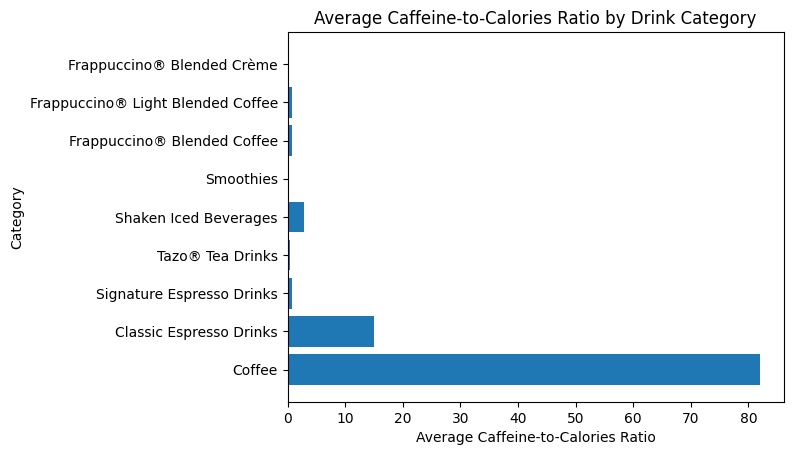

In [35]:
# Create a horizontal bar plot that shows the average ‘caffeine_to_calories’ ratio 
# for each drink category. Use matplotlib’s barh() function for this.
figure, axes_set = plt.subplots()
axes_set.set(title='Lineplot', xlabel='X', ylabel='Y')
axes_set.barh(starbucks['Beverage_category'],starbucks['caffeine_to_calories'])
#plt.barh(category_mean_ratio.index, category_mean_ratio.values, color='blue')

# Add labels and title
plt.xlabel('Average Caffeine-to-Calories Ratio')
plt.ylabel('Category')
plt.title('Average Caffeine-to-Calories Ratio by Drink Category')

# Display the plot
plt.show()

In [13]:
# Formulate and answer a question about the dataset. 
#For example, “What is the relationship between sugar and caffeine across different drink categories?”

# How does the calorie content vary across different drink categories in the Starbucks dataset, and is there a noticeable trend between the type of drink and its calorie content?

# To answer this question, we can analyze the average calorie content for each drink category in the dataset and visualize any potential trends or differences using plots. This analysis could provide insights into the calorie content of different types of drinks offered by Starbucks.